In [30]:
!pip install tslearn

%matplotlib inline
from tslearn.datasets import CachedDatasets
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = 25, 8
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.model_selection import train_test_split



In [31]:
Ford = pd.read_csv('FordA.csv')

In [32]:
Ford

,Timestamp,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
0,01/01/2025 00:00,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
1,01/01/2025 00:01,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
2,01/01/2025 00:02,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
3,01/01/2025 00:03,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
4,01/01/2025 00:04,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,04/01/2025 09:56,0.143630,-0.135823,-0.510278,-0.850804,-1.058080,-1.082756,-0.961845,-0.748399,-0.575669,...,0.865397,1.366315,1.896845,2.229968,2.192954,1.761128,0.939424,-0.096588,-1.076587,-1
4917,04/01/2025 09:57,-0.165568,-0.504614,-0.780065,-0.937044,-0.950518,-0.854054,-0.701736,-0.544270,-0.424473,...,-1.916656,-1.774917,-1.439674,-0.935756,-0.298758,0.406564,1.100995,1.722323,2.191682,1
4918,04/01/2025 09:58,0.710084,0.593979,0.381886,0.127285,-0.112304,-0.274140,-0.312698,-0.195008,0.063567,...,0.272573,-0.040822,-0.235795,-0.304746,-0.270086,-0.192379,-0.126553,-0.117822,-0.189094,1
4919,04/01/2025 09:59,0.006847,-0.140624,-0.270594,-0.378835,-0.461983,-0.515125,-0.538119,-0.532769,-0.495602,...,0.176298,-0.031868,-0.262996,-0.492936,-0.698291,-0.870596,-1.000708,-1.084108,-1.109963,1


In [33]:
print(Ford.shape)

(4921, 502)


In [34]:
FordA = Ford.to_numpy()  # shape will be (69, 275)
FordA = FordA[..., np.newaxis]  # shape becomes (69, 275, 1)


In [35]:
FordA.shape

(4921, 502, 1)

In [37]:
X = FordA[:, 1:]  # shape will be (69, 274, 1)
y = FordA[:, 0]  # shape will be (69, 1)

In [38]:
X.shape, y.shape

((4921, 501, 1), (4921, 1))

In [39]:
X_train,y_train,X_test,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [40]:
X_train=X_train[y_train<4]
y_train=y_train[y_train<4]
X_test=X_test[y_test<4]
y_test=y_test[y_test<4]


IndexError: boolean index did not match indexed array along axis 0; size of axis is 3936 but size of corresponding boolean axis is 985

In [41]:
X_train.shape

(3936, 501, 1)

# Preprocessing

In [42]:
seed=42
np.random.seed(seed)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz=X_train.shape[1]

C:\Users\shabb\AppData\Local\Temp\ipykernel_16232\1688125895.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X_train[yi].ravel(),"k-", color='gray', alpha=0.5, linewidth=2.5)


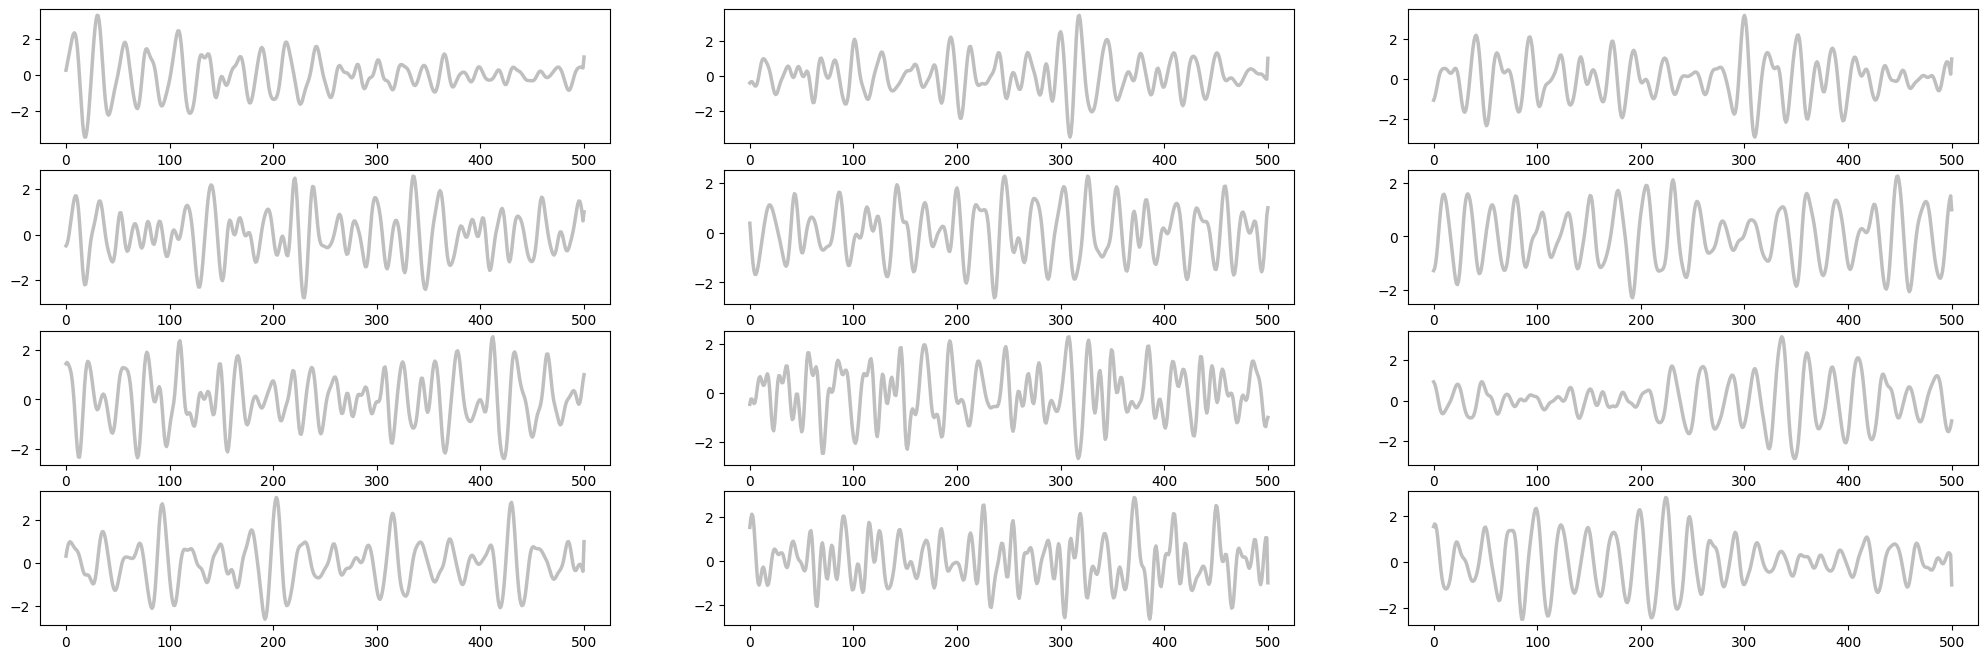

In [43]:
for yi in range(12):
    plt.subplot(4,3, yi + 1)
    plt.plot(X_train[yi].ravel(),"k-", color='gray', alpha=0.5, linewidth=2.5)

# Clusters

In [44]:
Sum_of_squared_distances = []
k_range = range(2, 8)
for k in k_range:
    km = TimeSeriesKMeans(n_clusters=k,n_init=2,verbose=False,max_iter_barycenter=10, metric="dtw", random_state=seed).fit(X_train)
    km=km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

MemoryError: Allocation failed (probably too large).

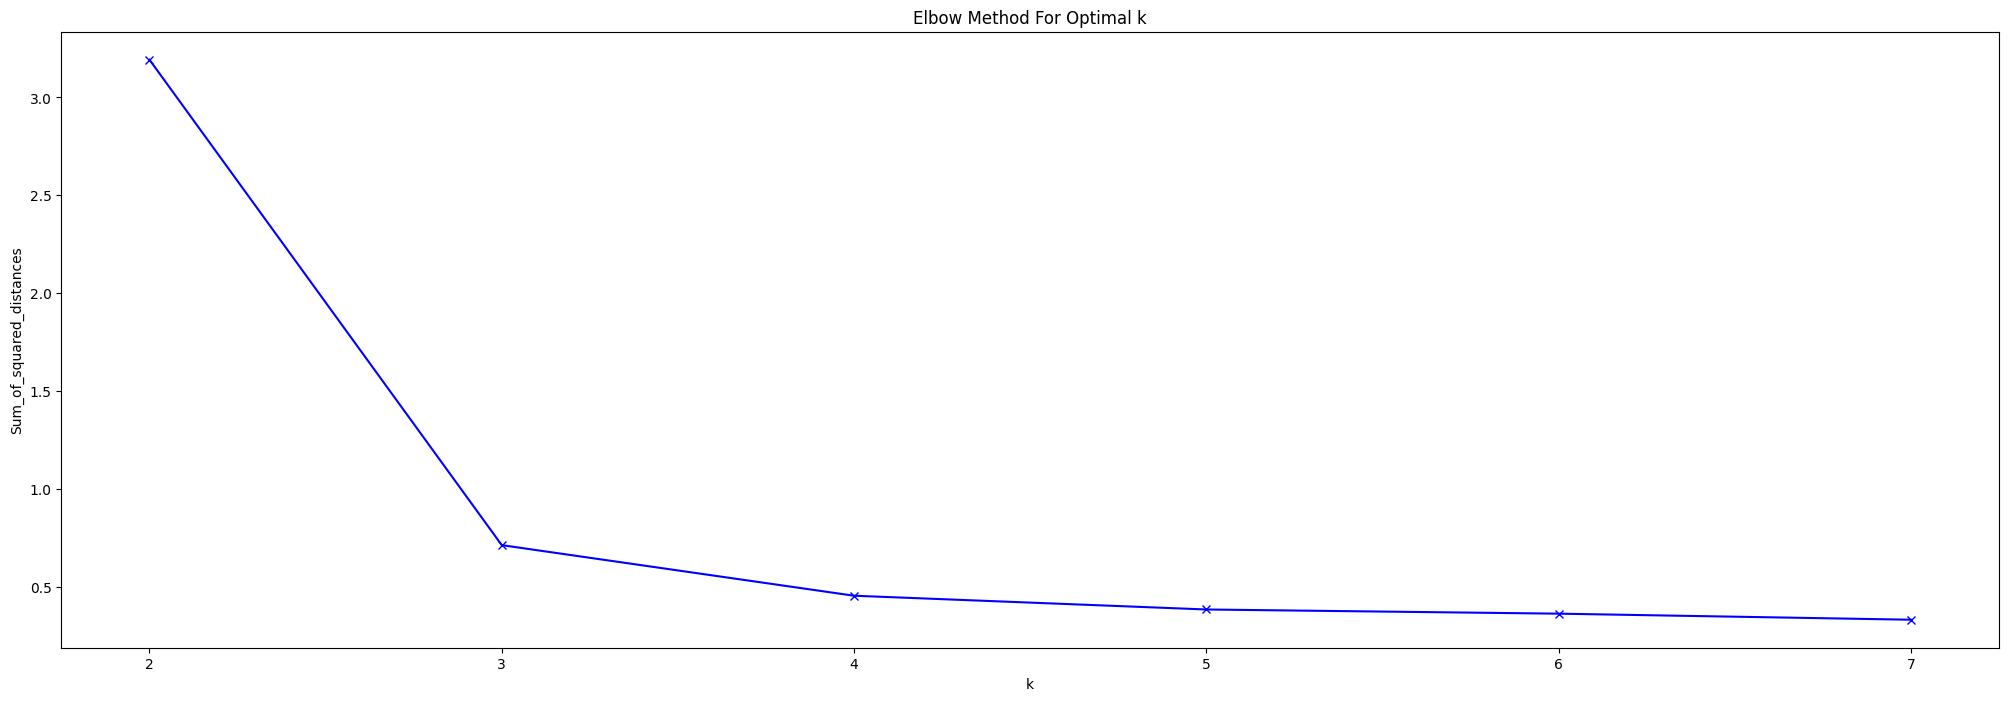

In [ ]:
plt.plot(k_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.69
For n_clusters = 3 The average silhouette_score is : 0.44
For n_clusters = 4 The average silhouette_score is : 0.40
For n_clusters = 5 The average silhouette_score is : 0.36


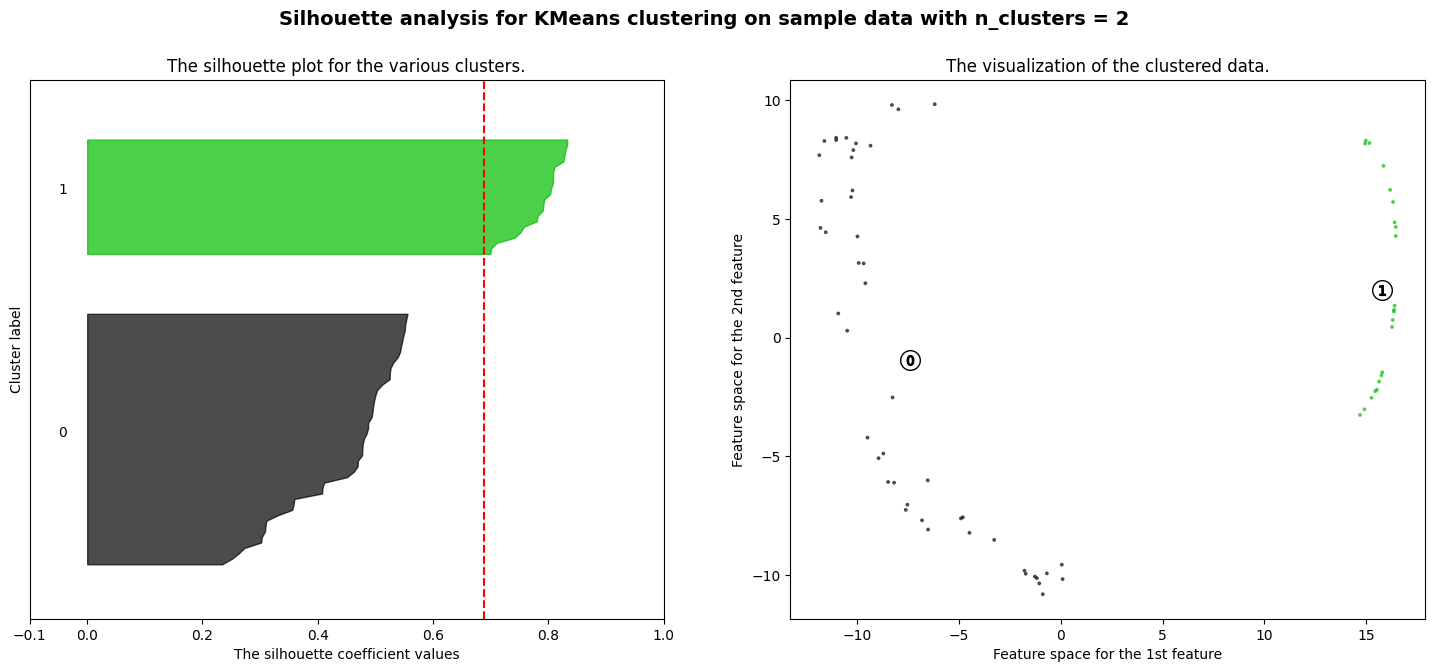

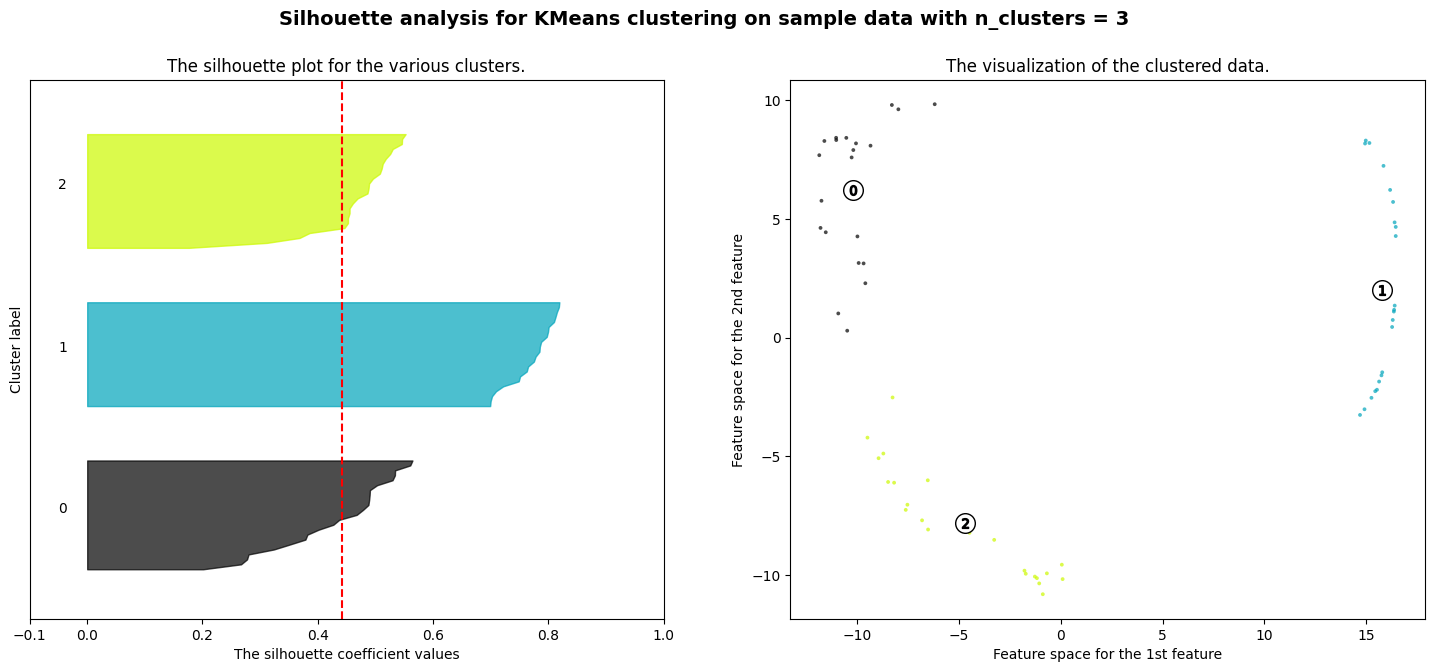

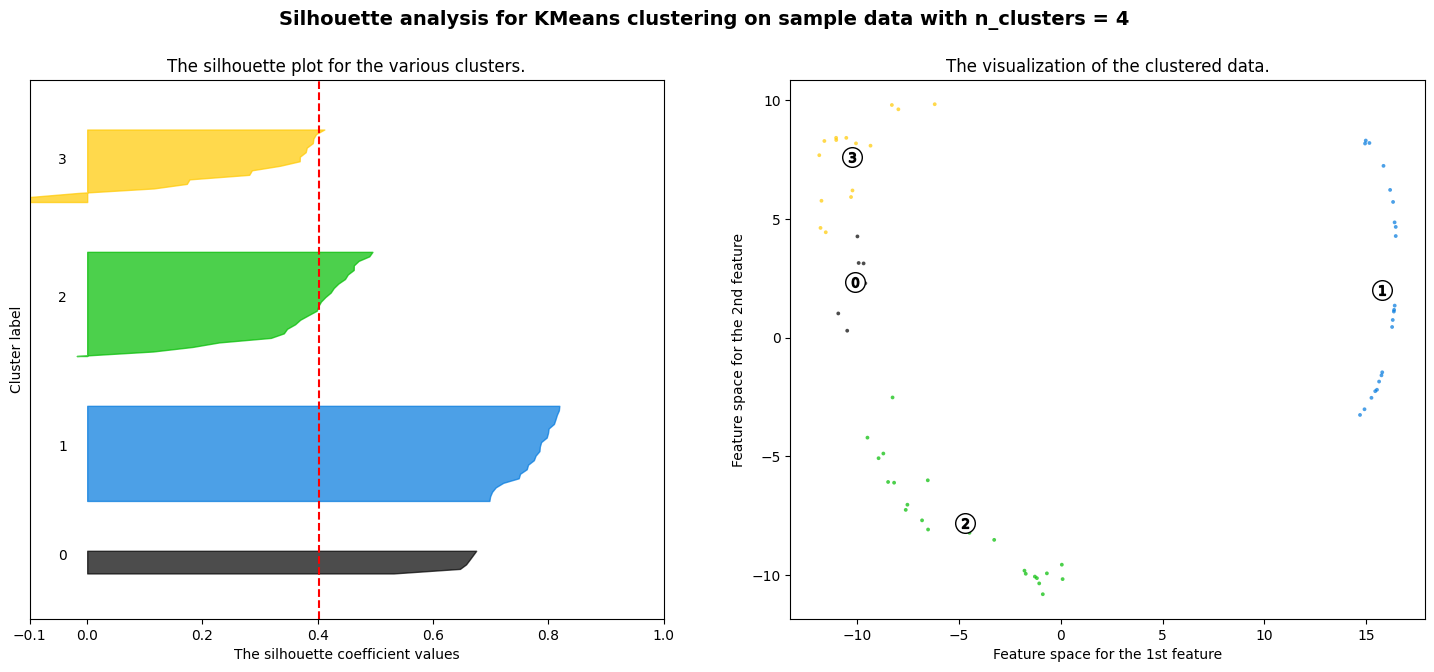

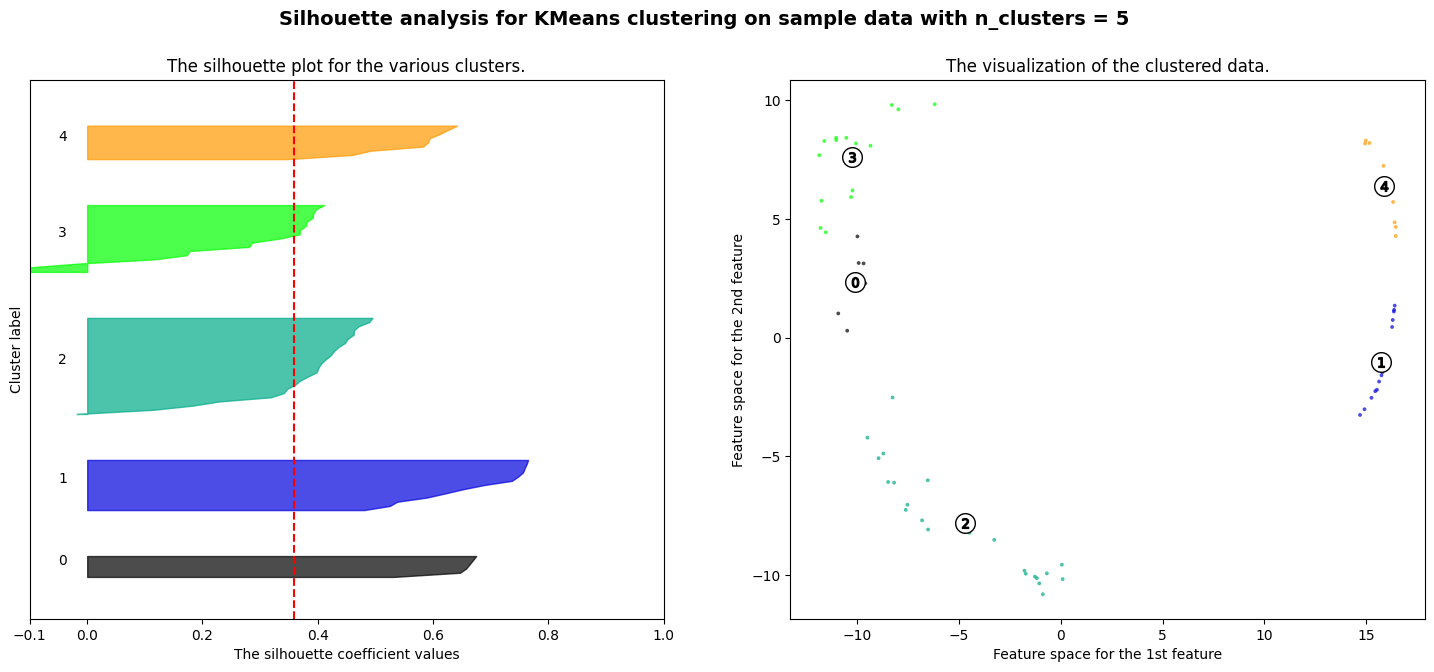

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


train_pca = list(X_train.reshape(X_train.shape[0], X_train.shape[1]))
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_pca)

X = train_pca

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is : {:.2f}"
        .format(silhouette_avg),
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


## Actual clusters based on labels provided

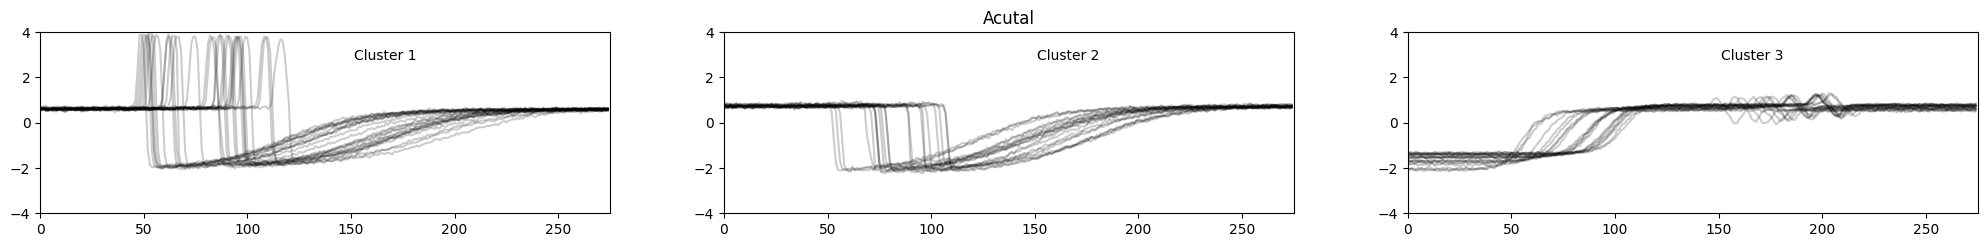

In [ ]:
n_clusters = 3
sz = X_train.shape[1]
seed = 0

## Actual clusters(using labels) plot
plt.figure()
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 1)
    for xx in X_train[y_train == yi+1]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Acutal")

Training Model using Euclidean distance

Euclidean k-means
Euclidean silhoutte: 0.50


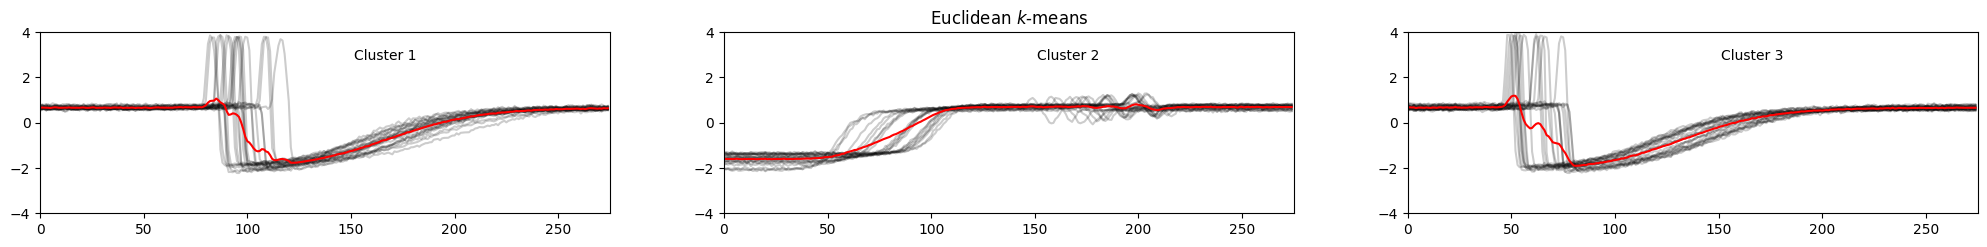

In [ ]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=seed)
y_pred_km = km.fit_predict(X_train)


print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_km, metric="euclidean")))

plt.figure()
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 1)
    for xx in X_train[y_pred_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

Training the model with DTW

DBA k-means
DBA silhoutte: 0.87


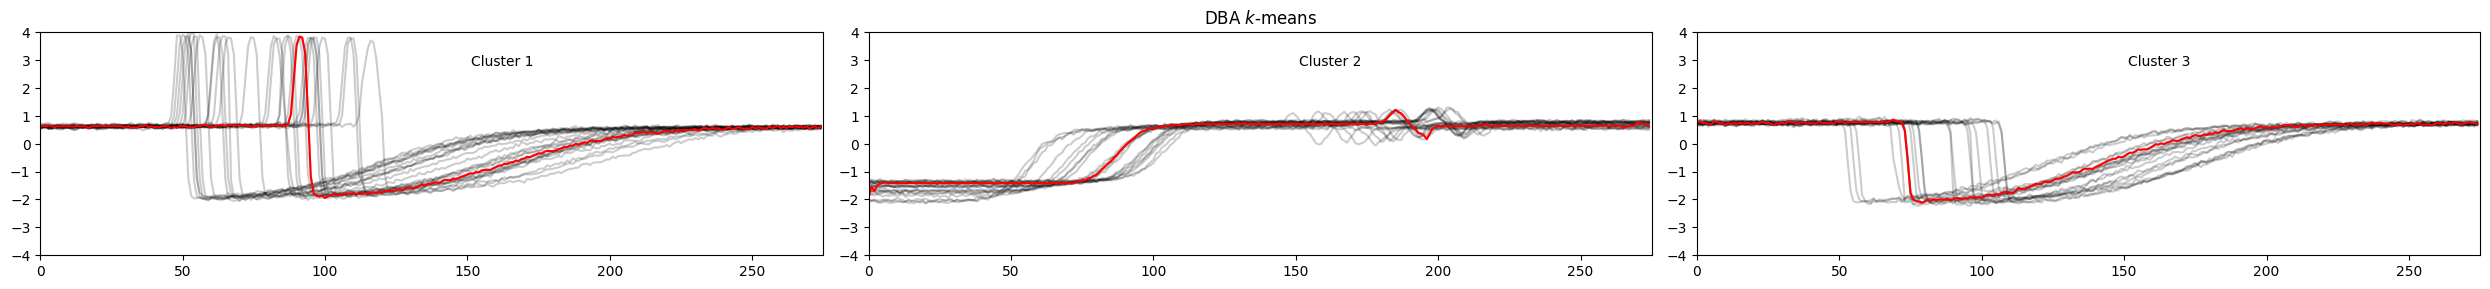

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred_dba_km = dba_km.fit_predict(X_train)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi+1)
    for xx in X_train[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
        


plt.tight_layout()
plt.show()

In [ ]:
from sklearn import metrics

print("Adjusted Rand Index for Euclidean: {:.2f}".format(metrics.adjusted_rand_score(y_train, y_pred_km)))
print("Adjusted Rand Index for DBA : {:.2f}".format(metrics.adjusted_rand_score(y_train, y_pred_dba_km)))

Adjusted Rand Index for Euclidean: 0.47
Adjusted Rand Index for DBA : 1.00


All Plots together

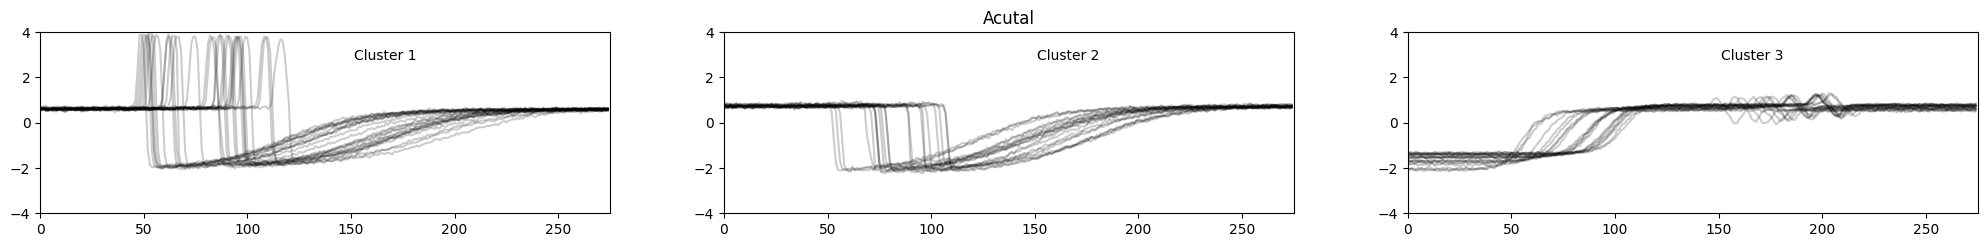

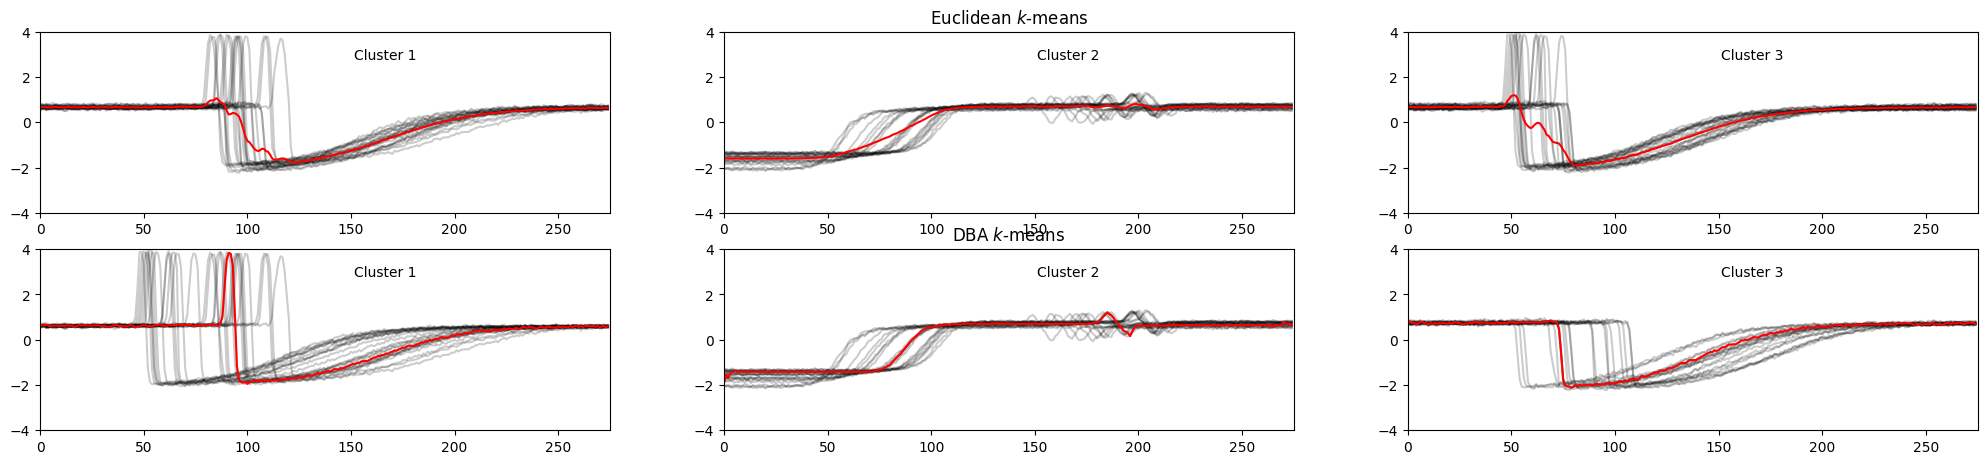

In [ ]:
## Actual clusters(using labels) plot
plt.figure()
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 1)
    for xx in X_train[y_train == yi+1]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Acutal")
        
plt.figure()
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 4)
    for xx in X_train[y_pred_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
        
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 7)
    for xx in X_train[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")